In [103]:
bl = (-0.8, -0.2)
name_bl = f'encoding_epochs_bl_{bl[0]}_{bl[1]}.png'
name_bl

name_tf = f'{name_bl[:-4]}_hits.h5'
name_tf

'encoding_epochs_bl_-0.8_-0.2_hits.h5'

In [ ]:
            power.apply_baseline(
                (-.8, -.2),
                mode='mean'
            ).plot_topo(
                mode='logratio',
                title='Average power',
                fig_facecolor='#555555',
                vmax=5e-22,
                vmin=-5e-22
                # yscale='log'
            ).save(
                
            )
            
            
            power.plot_topo(
                mode='logratio',
                title='Average power',
                fig_facecolor='#555555',
                vmax=1e-21
            )
            
            
            power.plot_joint(
                fmin=4.,
                yscale='log',
                baseline=(3.5, 4.0)
            )

In [20]:
import os.path as os

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.time_frequency import tfr_morlet


In [61]:
epochs_file = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\sub2\\epochs\\encoding_epochs.fif'
epochs = mne.read_epochs(epochs_file)

Reading D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\encoding_epochs.fif ...
    Found the data of interest:
        t =   -1500.00 ...    3995.00 ms
        0 CTF compensation matrices available


C:\Users\CCDM\AppData\Local\Temp\ipykernel_5148\278038261.py:2: RuntimeWarning: This filename (D:\Ekaterina_Voevodina\memory_formation\data\subjects\sub2\epochs\encoding_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_file)


Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated


In [67]:
epochs.pick_types(meg='grad')
epochs.info


<Info | 23 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0122, MEG0123, MEG0132, MEG0133, MEG0143, ...
 chs: 204 Gradiometers
 custom_ref_applied: False
 description: Vectorview system
 dev_head_t: MEG device -> head transform
 dig: 203 items (3 Cardinal, 4 HPI, 196 Extra)
 events: 1 item (list)
 experimenter: meg
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 90.0 Hz
 meas_date: 2021-04-21 13:01:38 UTC
 meas_id: 4 items (dict)
 nchan: 204
 proc_history: 2 items (list)
 proj_id: 1 item (ndarray)
 proj_name: memory_formation
 projs: []
 sfreq: 200.0 Hz
 subject_info: 6 items (dict)
>

    Using multitaper spectrum estimation with 7 DPSS windows


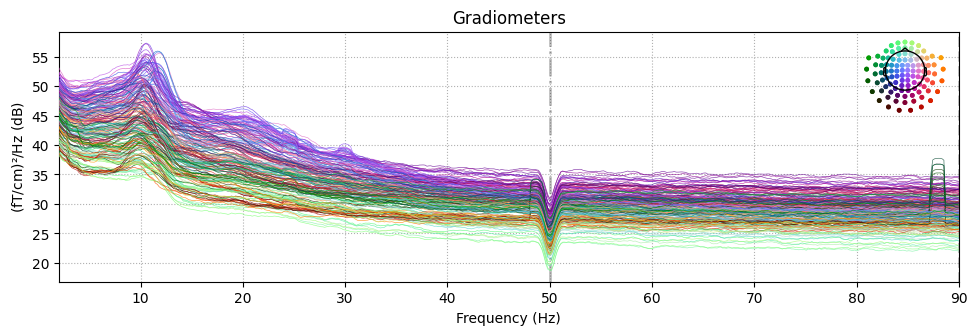

In [80]:
%matplotlib inline
fig = epochs['hits'].plot_psd(fmin=2., fmax=90., spatial_colors=True)


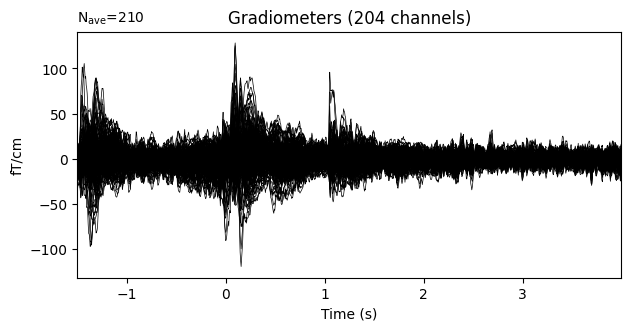

In [70]:
epochs.average().plot()

In [41]:
np.log10([6, 35])

array([0.77815125, 1.54406804])

In [97]:
freqs = np.logspace(*np.log10([3, 90]), num=15)
freqs

array([ 3.        ,  3.82498658,  4.87684078,  6.21795018,  7.92785866,
       10.10798433, 12.8876348 , 16.43167673, 20.95031432, 26.71155704,
       34.05711574, 43.42267022, 55.36371028, 70.58848295, 90.        ])

In [98]:
%matplotlib qt
freqs = np.logspace(*np.log10([4, 90]), num=25)
n_cycles = freqs / 2.  # different number of cycle per frequency
power = tfr_morlet(epochs['hits'], freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        decim=3, n_jobs=1)



Applying baseline correction (mode: mean)
No baseline correction applied


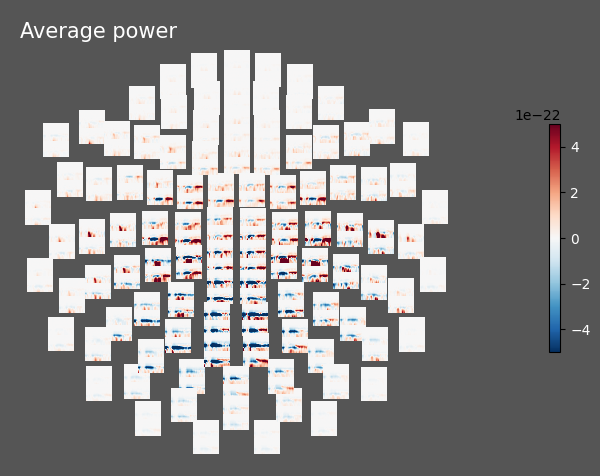

d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.p

In [96]:
power.apply_baseline(
    (-.8, -.2),
    mode='mean'
).plot_topo(
    mode='logratio',
    title='Average power',
    fig_facecolor='#555555',
    vmax=5e-22,
    vmin=-5e-22
    # yscale='log'
)

No baseline correction applied


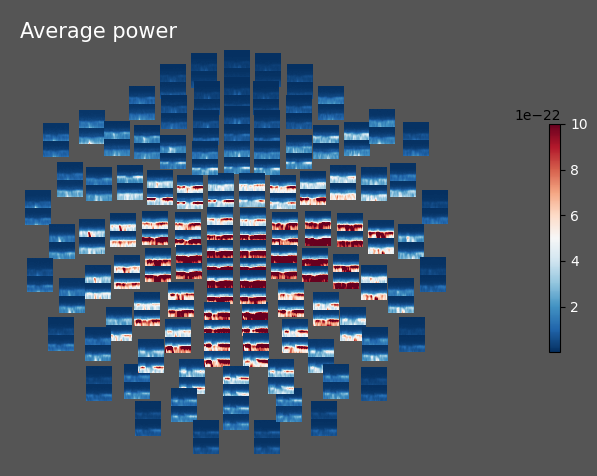

d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not adding contour to the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.py:287: RuntimeWarning: `mask` is None, not masking the plot ...
  func(*args, **kwargs)
d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\matplotlib\cbook\__init__.p

In [87]:
%matplotlib qt

power.plot_topo(
    mode='logratio',
    title='Average power',
    fig_facecolor='#555555',
    vmax=1e-21
)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


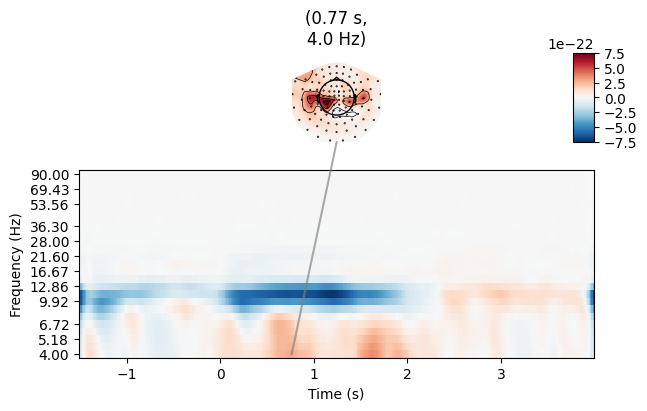

In [77]:
power.plot_joint(
    fmin=4.,
    yscale='log',
    baseline=(3.5, 4.0)
)

In [72]:
power.info

<Info | 23 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0122, MEG0123, MEG0132, MEG0133, MEG0143, ...
 chs: 204 Gradiometers
 custom_ref_applied: False
 description: Vectorview system
 dev_head_t: MEG device -> head transform
 dig: 203 items (3 Cardinal, 4 HPI, 196 Extra)
 events: 1 item (list)
 experimenter: meg
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 90.0 Hz
 meas_date: 2021-04-21 13:01:38 UTC
 meas_id: 4 items (dict)
 nchan: 204
 proc_history: 2 items (list)
 proj_id: 1 item (ndarray)
 proj_name: memory_formation
 projs: []
 sfreq: 66.7 Hz
 subject_info: 6 items (dict)
>

In [66]:
str(epochs.info)

'<Info | 23 non-empty values\n acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...\n bads: []\n ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...\n chs: 204 Gradiometers, 102 Magnetometers, 2 EOG, 1 ECG, 13 misc, 4 Stimulus, 9 CHPI\n custom_ref_applied: False\n description: Vectorview system\n dev_head_t: MEG device -> head transform\n dig: 203 items (3 Cardinal, 4 HPI, 196 Extra)\n events: 1 item (list)\n experimenter: meg\n file_id: 4 items (dict)\n highpass: 0.5 Hz\n hpi_meas: 1 item (list)\n hpi_results: 1 item (list)\n hpi_subsystem: 2 items (dict)\n line_freq: 50.0\n lowpass: 90.0 Hz\n meas_date: 2021-04-21 13:01:38 UTC\n meas_id: 4 items (dict)\n nchan: 335\n proc_history: 2 items (list)\n proj_id: 1 item (ndarray)\n proj_name: memory_formation\n projs: []\n sfreq: 200.0 Hz\n subject_info: 6 items (dict)\n>'